In [21]:
# Import the necessary libraries

# %pip install pandas
# %pip install sqlalchemy
# %pip install dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from dotenv import load_dotenv

import os


In [22]:
def horizontal_barplot(x, y, title, xlabel, ylabel, filename, total_entries):
    # plot most active users by number of tracks added
    # color palette
    plt.style.use("dark_background")
    palette = sns.color_palette("RdPu", 10)[::-1]
    sns.set_palette(palette)
    sns.color_palette("rocket")

    # create a figure with size 12x6
    plt.figure(figsize=(12, 6))

    # set labels and titles
    plt.title(title, fontsize=16, fontweight="bold")
    plt.xlabel(xlabel, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=14, fontweight="bold")

    # Create a horizontal bar plot 
    barplot = sns.barplot(
            x=x,
            y=y,
            palette=palette,
            edgecolor="black",
            orient="h",
    )

    # Add the total number of tracks inside the bars
    for i, p in enumerate(barplot.patches):
            width = p.get_width()
            # Get the RGB color of the bar and convert it to HSV
            rgb_color = mcolors.colorConverter.to_rgb(palette[i])
            hsv_color = mcolors.rgb_to_hsv(rgb_color)
            # If the value/brightness component of the HSV color is less than 0.5, set the text color to white, else set it to black
            text_color = 'white' if hsv_color[2] < 0.5 else 'black'
            # Add the text inside the bar
            plt.text(x = width/2,
                    y = p.get_y()+(p.get_height()/2), 
                    s = '{:.0f}'.format(width),
                    va = 'center',
                    color = text_color,  # Set the text color
                    fontsize = 14,
                    fontweight = 'bold')
            

    # Add total of tracks as side information on the graph

    total_tracks = total_entries
    plt.text(
            x = 0.98, 
            y = 0.02, 
            s = f'Total tracks: {total_tracks}', 
            transform=plt.gca().transAxes, 
            fontsize=12, 
            horizontalalignment='right'
            )


    # adjust the layout of the plot
    plt.tight_layout()

    # save the plot as a png file
    plt.savefig(f"../images/{filename}", dpi=300)

    plt.show()

In [23]:
# Establish a connection to the database

load_dotenv()
db_url = os.getenv("DB_URL")
engine = create_engine(db_url)

In [24]:
# Query to retrieve data from all tables using SQL joins
query = """
SELECT
    T.track_id,
    T.track_name,
    T.track_album,
    T.track_duration,
    U.user_id AS added_by_user_id,
    U.user_name AS added_by_user_name,
    GROUP_CONCAT(DISTINCT A.artist_name) AS artist_names,
    GROUP_CONCAT(DISTINCT G.genre_name) AS genre_names
FROM Tracks T
LEFT JOIN Users U ON T.added_by = U.user_id
LEFT JOIN TrackArtists TA ON T.track_id = TA.track_id
LEFT JOIN Artists A ON TA.artist_id = A.artist_id
LEFT JOIN TrackGenres TG ON T.track_id = TG.track_id
LEFT JOIN Genres G ON TG.genre_id = G.genre_id
GROUP BY T.track_id, T.track_name, T.track_album, T.track_duration, U.user_id, U.user_name;
"""

# Create a Pandas DataFrame from the retrieved data
combined_df = pd.read_sql(query, engine)

# Close the database connection
engine.dispose()

# Display the combined DataFrame
print(combined_df.head())

                 track_id                       track_name  \
0  003FTlCpBTM4eSqYSWPv4H                     Swing, Swing   
1  006pMMCuRo2TFjh8sNGSov     Dias De Luta, Dias De Gloria   
2  00Blm7zeNqgYLPtW6zg8cj  One Right Now (with The Weeknd)   
3  00cBcYOlnHoXX9ver3cmdE               A Little Bit Yours   
4  00da5UpHHr2CcmAedVX3Be                   Baby, I'm Back   

                track_album  track_duration              added_by_user_id  \
0  The All-American Rejects          233266     fxds0dm5raq212998fonjoe9c   
1         Imunidade Musical          145466              danielebettega95   
2             One Right Now          193506     suqj6g68oug3i0vw4nuebfrto   
3        A Little Bit Yours          225680                  fabiozotesso   
4               Super Saucy          219186  31lpdr2gqa2xrig77zktc66z66py   

       added_by_user_name              artist_names  \
0          Hugo Fernandes  The All-American Rejects   
1         Daniele Bettega         Charlie Brown Jr.   

In [25]:
total_tracks = combined_df.shape[0]
print(f"Total number of tracks: {total_tracks}")

Total number of tracks: 1777


c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


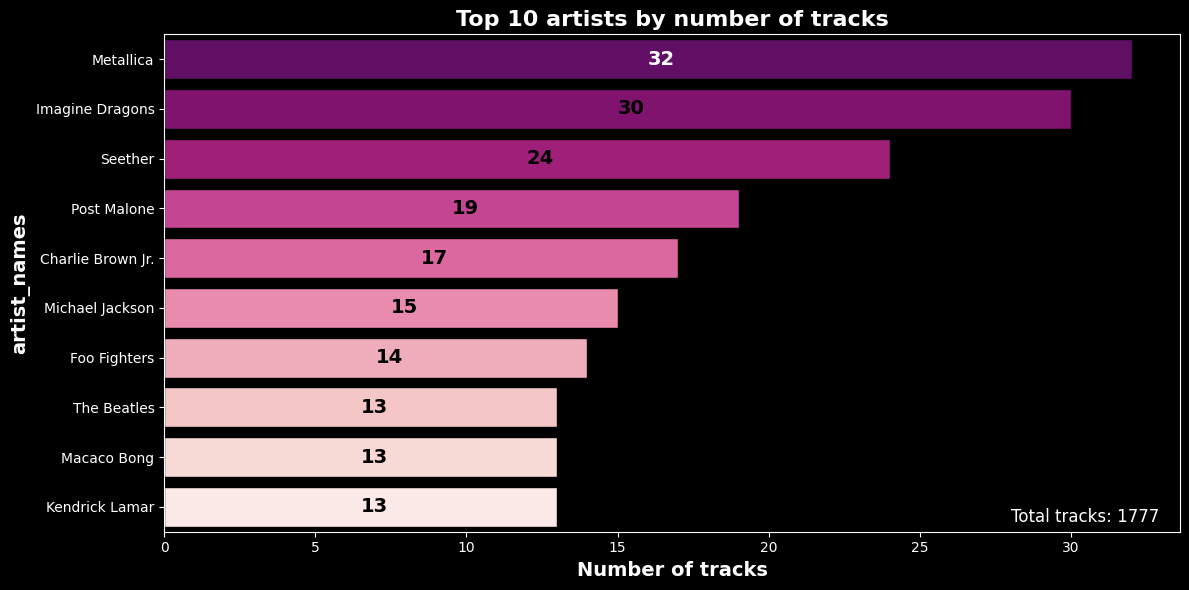

In [26]:
# Get the top artists by number of tracks
# Calculate the count of tracks per artist
artist_track_counts = combined_df['artist_names'].str.split(',').explode().str.strip().value_counts()

# Determine the top N artists
top_artists = artist_track_counts.head(10)

# plot 
horizontal_barplot(
        x=top_artists.values,
        y=top_artists.index,
        title="Top 10 artists by number of tracks",
        xlabel="Number of tracks",
        ylabel="Artist",
        filename="top_artists.png",
        total_entries=total_tracks
        )

c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phenr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


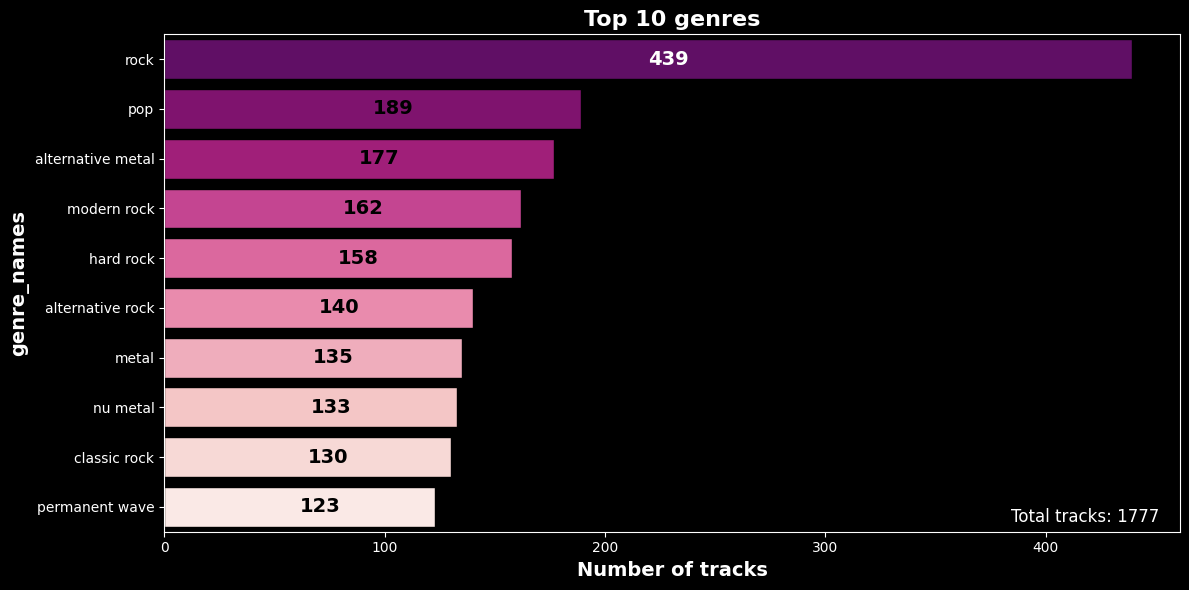

In [28]:
# get the top genres
# Calculate the count of tracks per genre
genre_track_counts = combined_df['genre_names'].str.split(',').explode().str.strip().value_counts()

# Determine the top N genres
top_genres = genre_track_counts.head(10)

# plot
horizontal_barplot(
    x=top_genres.values,
    y=top_genres.index,
    title="Top 10 genres",
    xlabel="Number of tracks",
    ylabel="Genre",
    filename="top_genres.png",
    total_entries=total_tracks,
)